# Estatísticas das três árvores

In [43]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize

In [44]:
def plotTreesLines(df, x, y, x_label, y_label, title):
    sns.set_style("whitegrid")

    # Criar a figura
    palette = ["#0047AB", "#FFBF00", "#D22B2B"]
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x=x, y=y, hue="Tipo_Arvore", palette=palette)

    # Rótulos e título com melhor formatação
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    # Remover as bordas superior e direita
    sns.despine(top=True, right=True)

    # Retirar grade
    plt.grid(False)
    # Ajustar layout
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

In [45]:
BST_df = pd.read_csv('bst.csv')
AVL_df = pd.read_csv('avl.csv')
RBT_df = pd.read_csv('rbt.csv')

df = pd.concat([BST_df, AVL_df, RBT_df])
df.columns

Index(['Num_Docs', 'Altura', 'Total_Nos', 'Profundidade_Media',
       'Profundidade_Minima', 'Max_Desbalanceamento', 'Tempo_Total_Indexacao',
       'Tempo_Medio_Insercao', 'Densidade_Arvore', 'Maior_Galho',
       'Menor_Galho', 'Total_Comparacoes_Indexacao',
       'Tempo_Maximo_Busca_Amostra', 'Comparacoes_Total_Busca_Amostra',
       'Tempo_Medio_Busca_Amostra_Por_Palavra',
       'Comparacoes_Medias_Busca_Amostra_Por_Palavra', 'Tipo_Arvore'],
      dtype='object')

In [76]:

num_docs_interessantes = [100, 1000, 5000, 10000]

# DataFrame vazio para armazenar as linhas filtradas
df_filtrado = pd.DataFrame()

# Para cada número de documento interessante e para cada tipo de árvore,
# vamos encontrar a linha que melhor o representa (a mais próxima ou a última <= ao alvo)
for num_doc_alvo in num_docs_interessantes:
    for tipo_arvore in df['Tipo_Arvore'].unique():
        # Filtra o DataFrame para o tipo de árvore atual e para Num_Docs menores ou iguais ao alvo
        sub_df = df[(df['Num_Docs'] <= num_doc_alvo) & (df['Tipo_Arvore'] == tipo_arvore)]
        
        # Se houver dados que satisfazem a condição (árvore não está vazia para esse num_doc_alvo)
        if not sub_df.empty:
            # Pegamos a linha mais recente (maior Num_Docs) que satisfaz a condição
            linha_representativa = sub_df.loc[sub_df['Num_Docs'].idxmax()]
            
            # Adiciona esta linha ao DataFrame filtrado. .to_frame().T transforma a Series em DataFrame de uma linha.
            df_filtrado = pd.concat([df_filtrado, linha_representativa.to_frame().T], ignore_index=True)

# Selecionar as colunas relevantes para a tabela
colunas_para_tabela = [
    'Num_Docs', 'Tipo_Arvore', 'Altura', 
    'Profundidade_Media', 'Profundidade_Minima', 'Max_Desbalanceamento'
]

# Selecionar apenas as colunas desejadas do DataFrame filtrado
df_final_tabela = df_filtrado[colunas_para_tabela]

# Ordenar o DataFrame final para melhor apresentação na tabela
# Primeiro por 'Num_Docs' e depois por 'Tipo_Arvore'
df_final_tabela = df_final_tabela.sort_values(by=['Num_Docs', 'Tipo_Arvore']).reset_index(drop=True)

# Imprimir a tabela formatada
print("Tabela Comparativa: Altura e Estrutura das Árvores vs. Número de Documentos")
# Usar to_string() para garantir que toda a tabela seja impressa sem truncamento
print(df_final_tabela.to_string(index=False))

print("\nNotas da Tabela:")
print("1. Altura: Refere-se à profundidade máxima da árvore (o maior caminho da raiz até uma folha).")
print("2. Max_Desbalanceamento: Para AVL, este valor é estritamente 1. Para BST e RBT, o Max_Desbalanceamento")

Tabela Comparativa: Altura e Estrutura das Árvores vs. Número de Documentos
Num_Docs Tipo_Arvore Altura Profundidade_Media Profundidade_Minima Max_Desbalanceamento
     100         AVL     14            10.9717                   9                    1
     100         BST     29            15.4204                   5                    0
     100         RBT     15              11.05                   9                    6
    1000         AVL     16            12.3435                  10                    1
    1000         BST     34            17.4718                   5                    0
    1000         RBT     16            12.4675                  10                    7
    5000         AVL     16            12.6024                  11                    1
    5000         BST     36            17.8466                   5                    0
    5000         RBT     17            12.7318                  10                    7
   10000         AVL     16            12.60

---

### Crescimento Estrutural
#### Altura da Árvore

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


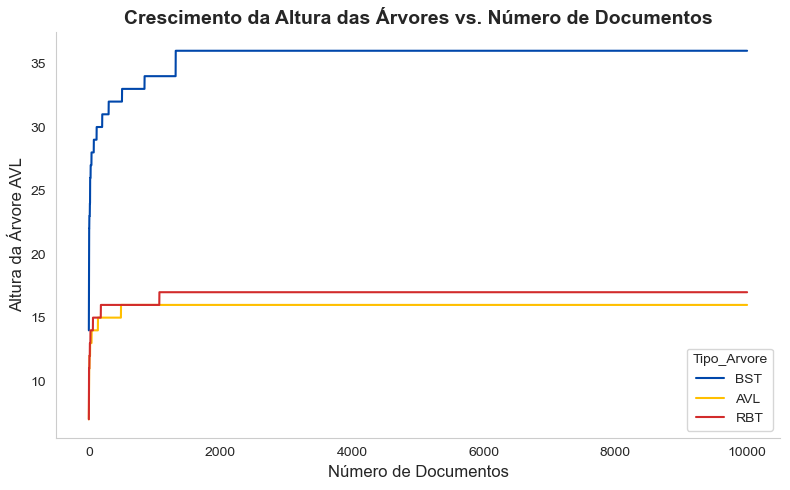

In [46]:
plotTreesLines(df, "Num_Docs", "Altura", "Número de Documentos", "Altura da Árvore AVL", "Crescimento da Altura das Árvores vs. Número de Documentos")



### **Crescimento da Altura das Árvores vs. Número de Documentos: Uma Análise Comparativa de Estruturas de Índice**


**Análise Detalhada:**

1.  **Árvore Binária de Busca (BST) – (Linha Azul):**
    * O gráfico evidencia um **crescimento de altura acentuado e quase linear** para a BST à medida que o número de documentos aumenta. A altura da árvore dispara rapidamente, atingindo valores muito elevados.
    * **Implicação:** Este comportamento é característico da **degeneração da BST**. Dada a natureza sequencial da inserção de documentos, a ausência de mecanismos de autobalanceamento permite que a árvore se assemelhe a uma lista encadeada. Consequentemente, as operações de busca e inserção se aproximam de uma complexidade de tempo de **O(N)** (linear), resultando em degradação severa do desempenho e, em cenários de grande volume de dados, pode levar a problemas de esgotamento de recursos, como "stack overflow" ou `std::bad_alloc`, como foi o caso quando tentamos incialmente gerar o `CSV` com 1000 documentos.

2.  **Árvore AVL (Adelson-Velsky e Landis) – (Linha Amarela):**
    * A linha da AVL demonstra um **crescimento de altura notavelmente controlado e gradual**, mantendo-se em patamares significativamente mais baixos que a BST. A altura da árvore exibe um comportamento em "degraus", refletindo as operações de rotação que ocorrem para manter seu balanceamento estrito. Para 10.000 documentos, a altura da AVL se estabiliza em aproximadamente 16.
    * **Implicação:** Este padrão é o ideal para uma árvore binária de busca. A AVL garante que sua altura cresça logaritmicamente (**O(log N)**), proporcionando desempenho ótimo e previsível para todas as operações, independentemente da ordem de inserção dos dados.

3.  **Árvore Rubro-Negra (RBT) – (Linha Vermelha):**
    * A RBT exibe um **crescimento de altura igualmente controlado e logarítmico**, muito similar ao da AVL, mas posicionando-se ligeiramente acima dela. Para 10.000 documentos, sua altura se estabiliza em torno de 17.
    * **Implicação:** A RBT, assim como a AVL, é uma árvore auto-balanceada que assegura complexidade **O(log N)**. Sua altura pode ser marginalmente maior que a da AVL devido às suas regras de balanceamento serem ligeiramente menos restritivas, o que, por vezes, pode resultar em um número menor de rotações complexas por operação em comparação com a AVL.

**Conclusão:**

O gráfico serve como uma evidência empírica robusta da **superioridade das árvores binárias de busca auto-balanceadas (AVL e RBT) sobre a BST simples** para aplicações que envolvem volumes de dados dinâmicos e crescentes, como a indexação de documentos. Enquanto a BST demonstra uma susceptibilidade crítica à degeneração que compromete seu desempenho, tanto a AVL quanto a RBT mantêm a altura da árvore sob controle logarítmico, assegurando a eficiência e a previsibilidade das operações de busca, inserção e remoção. Esta análise sublinha a importância da escolha da estrutura de dados adequada para garantir a escalabilidade e a robustez de sistemas de informação.

---

#### Profundidade Média

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


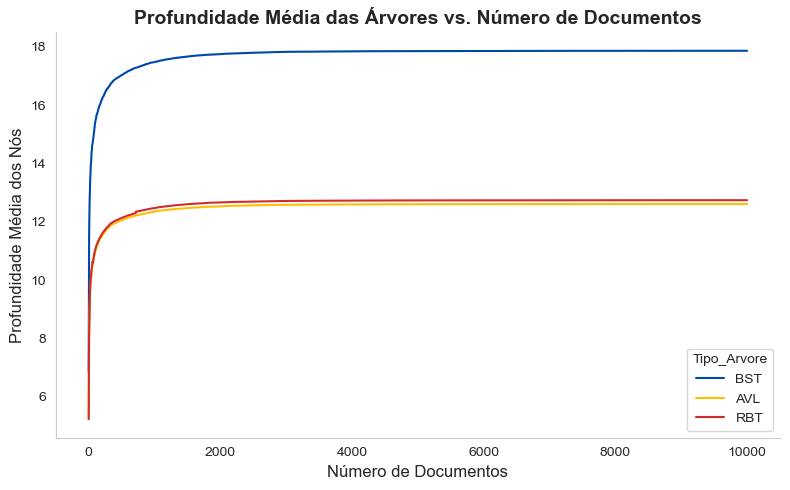

In [47]:
plotTreesLines(df, "Num_Docs", "Profundidade_Media", "Número de Documentos", "Profundidade Média dos Nós", "Profundidade Média das Árvores vs. Número de Documentos")

---

#### Comparação da Profundidade Média de cada árvore com a escala logaritmica 

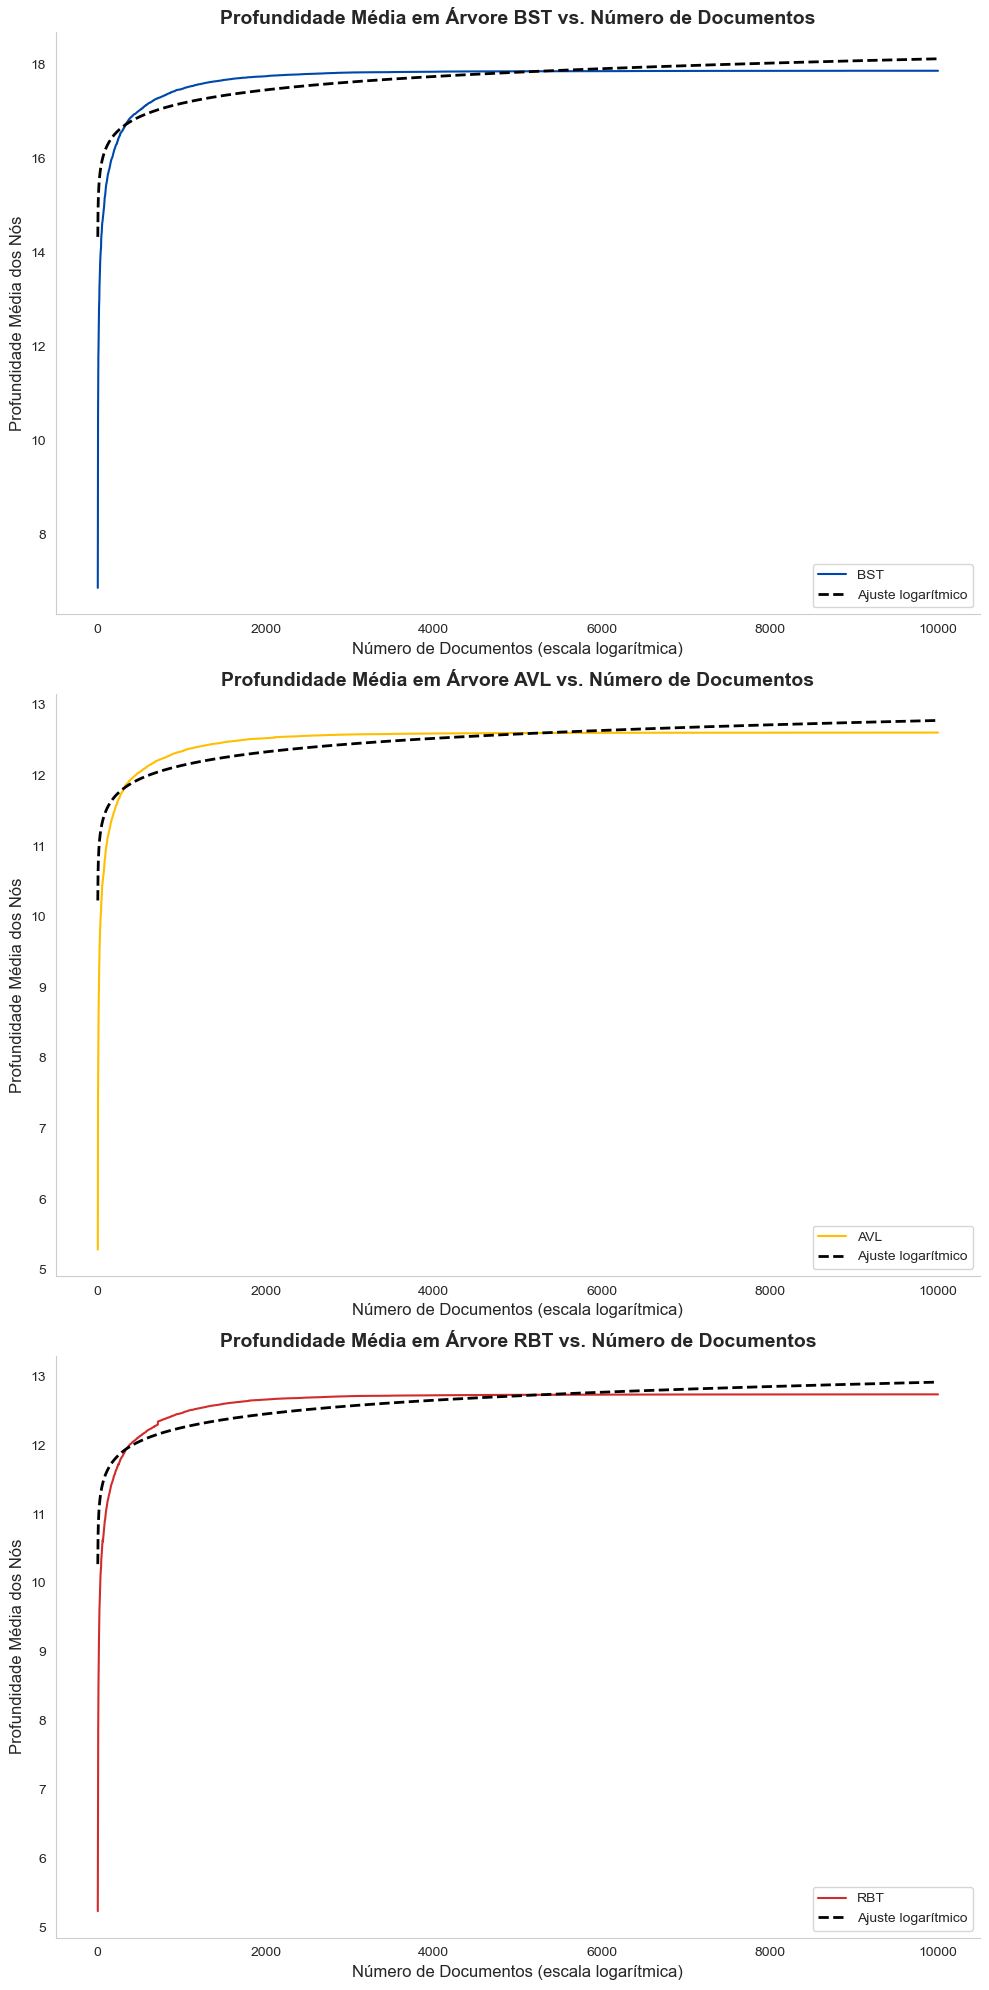

In [48]:

# Estilo visual
sns.set_style("whitegrid")

plt.figure(figsize=(10,20))

# Grafico da BST
plt.subplot(3,1,1) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'BST']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]

plt.plot(n_docs, profundidade_media, color='#0047AB', label='BST')
plt.plot(n_docs, ajuste, linestyle='--', color='black', linewidth=2, label='Ajuste logarítmico')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore BST vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)

# Grafico da AVL
plt.subplot(3,1,2) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'AVL']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]


plt.plot(n_docs, profundidade_media, color='#FFBF00', label='AVL')
plt.plot(n_docs, ajuste, linestyle='--', color='black', linewidth=2, label='Ajuste logarítmico')


# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore AVL vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)

# Grafico da RBT
plt.subplot(3,1,3) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'RBT']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'RBT']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]

plt.plot(n_docs, profundidade_media, color='#D22B2B', label='RBT')
plt.plot(n_docs, ajuste, linestyle='--', color='black', linewidth=2, label='Ajuste logarítmico')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore RBT vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)
# Mostrar gráfico
plt.show()


---
========================= Abaixo tem apenas dados da AVL =========================

---

O gráfico apresentado mostra a relação entre o "Número de Documentos" (em escala logarítmica) e a "Profundidade Média dos Nós" nas árvores.

**Análise:**

1.  **Dados Observados (Pontos Azuis):** Os pontos azuis representam os dados coletados, mostrando a profundidade média dos nós para diferentes números de documentos. Percebe-se que, à medida que o número de documentos aumenta, a profundidade média dos nós também aumenta.

2.  **Linha Conectando os Pontos (Linha Roxa Clara):** Essa linha mostra a trajetória dos dados observados. No início, para um número muito pequeno de documentos, a profundidade média dos nós tem um comportamento mais irregular e com saltos maiores. No entanto, à medida que o número de documentos cresce, a profundidade média dos nós se torna mais suave e previsível.

3.  **Ajuste Logarítmico (Linha Laranja Tracejada):** Uma linha de ajuste logarítmico foi sobreposta aos dados. Essa linha representa um modelo do tipo $y = a \cdot \log(x) + b$, onde $y$ é a profundidade média e $x$ é o número de documentos.

4.  **Qualidade do Ajuste Logarítmico:**
    * Para um número maior de documentos (a partir de aproximadamente $10^1$ ou 10 documentos), o ajuste logarítmico parece se encaixar muito bem aos dados observados. A linha laranja tracejada acompanha de perto os pontos azuis, indicando que a profundidade média dos nós em uma árvore AVL cresce de forma logarítmica com o número de documentos.
    * Para um número muito pequeno de documentos (abaixo de 10), o ajuste logarítmico não é tão preciso. Há uma diferença notável entre os dados observados e a linha de ajuste, especialmente na porção inicial do gráfico. Isso é esperado, pois o comportamento de uma estrutura de dados para um volume muito pequeno de elementos pode não seguir perfeitamente a complexidade assintótica que se aplica a volumes maiores.

**Conclusão:**

O gráfico ilustra um conceito fundamental sobre árvores AVL: sua altura (e, consequentemente, a profundidade média dos nós) cresce de forma logarítmica com o número de elementos. Isso é uma das principais vantagens das árvores AVL, pois garante que as operações (inserção, busca, remoção) tenham uma complexidade de tempo logarítmica, mesmo no pior caso, devido ao seu auto-balanceamento.

O ajuste logarítmico confirma essa característica teórica para um volume significativo de documentos, demonstrando empiricamente o desempenho eficiente das árvores AVL em termos de profundidade. As pequenas discrepâncias para poucos documentos são normalmente irrelevantes em cenários de uso prático, onde as árvores AVL são aplicadas para gerenciar grandes volumes de dados.

---

#### Profundidade Mínima

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


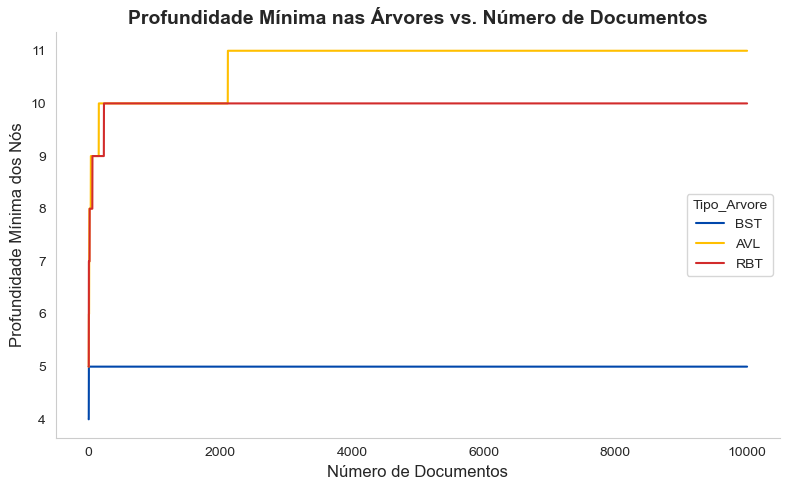

In [49]:
plotTreesLines(df, 'Num_Docs', 'Profundidade_Minima', 'Número de Documentos', 'Profundidade Mínima dos Nós', 'Profundidade Mínima nas Árvores vs. Número de Documentos')

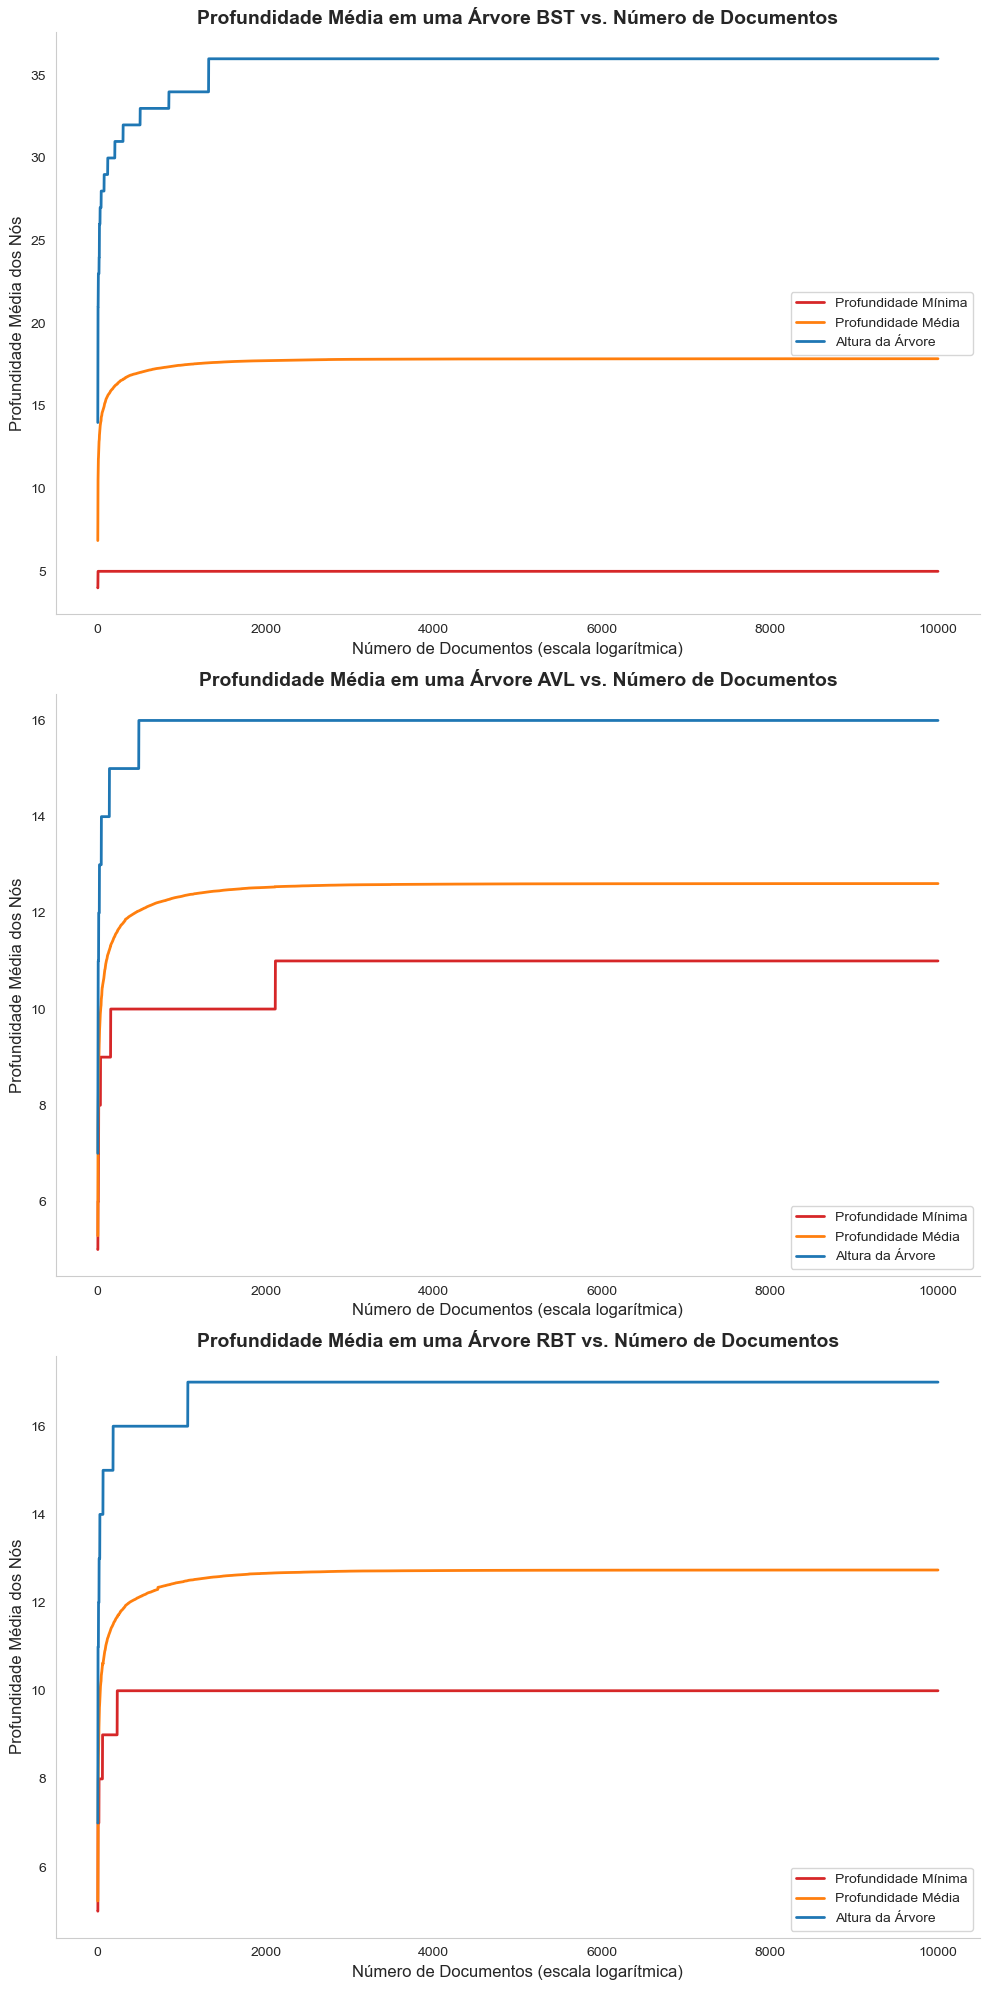

In [50]:
# Estilo visual
sns.set_style("whitegrid")

plt.figure(figsize=(10,20))

# Grafico da BST
plt.subplot(3,1,1) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'BST']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'BST']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em uma Árvore BST vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# Grafico da AVL
plt.subplot(3,1,2) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'AVL']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'AVL']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em uma Árvore AVL vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# Grafico da RBT
plt.subplot(3,1,3) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'RBT']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'RBT']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'RBT']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'RBT']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em uma Árvore RBT vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)
# Mostrar gráfico
plt.show()


Altura: deve crescer de forma logarítmica, mas sempre maior que as demais curvas.

Profundidade Média: deve crescer mais suavemente, acompanhando parcialmente a altura.

Profundidade Mínima: geralmente cresce devagar — se for constante, indica subárvores rasas.

Como houve saltos ou quebras de padrão, isso pode indicar inserções que impactaram partes da árvore mais rasas.

---

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


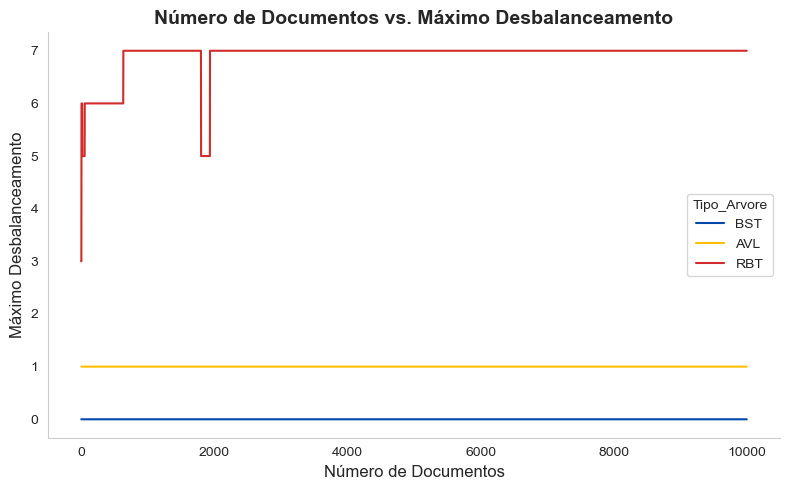

In [51]:
plotTreesLines(df, 'Num_Docs', 'Max_Desbalanceamento', 'Número de Documentos', 'Máximo Desbalanceamento', 'Número de Documentos vs. Máximo Desbalanceamento')

Na árvore AVL, o máximo desbalanceamento (diferença de altura entre subárvores) não passa de 1, porque essa é justamente a propriedade da AVL para garantir o balanceamento.

---

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


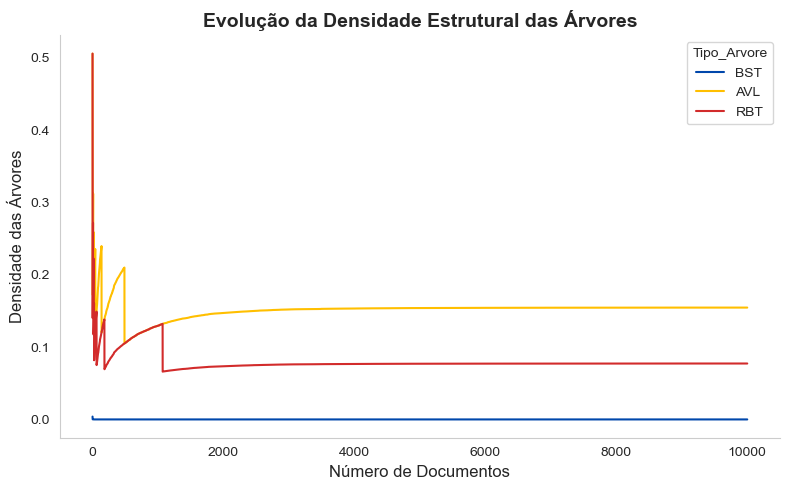

In [52]:
plotTreesLines(df, 'Num_Docs', 'Densidade_Arvore', 'Número de Documentos', 'Densidade das Árvores', 'Evolução da Densidade Estrutural das Árvores')

---

#### Razão Maior/Menor Galho

In [53]:
# Calcular a razão Maior_Galho / Menor_Galho
# Adiciona um pequeno valor ao denominador para evitar divisão por zero, caso ocorra
df['Razao_Galhos'] = df['Maior_Galho'] / (df['Menor_Galho'] + 1e-9)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


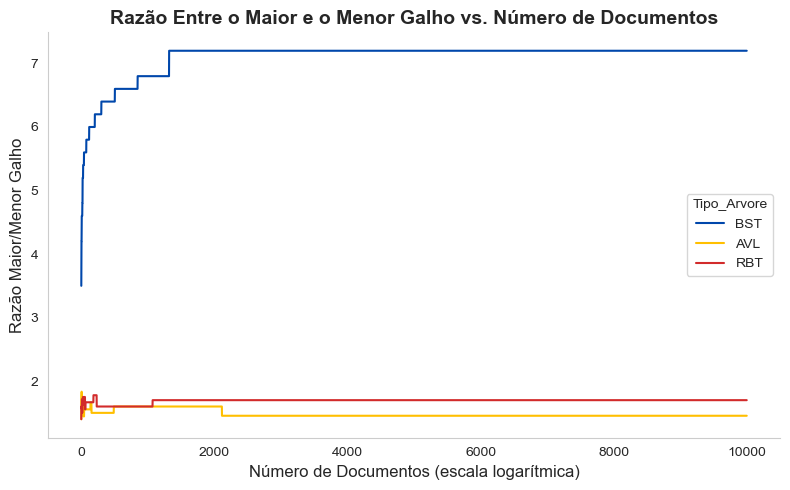

In [54]:
plotTreesLines(df, 'Num_Docs', 'Razao_Galhos', 'Número de Documentos (escala logarítmica)', 'Razão Maior/Menor Galho', 'Razão Entre o Maior e o Menor Galho vs. Número de Documentos')

---

#### Desempenho Temporal

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


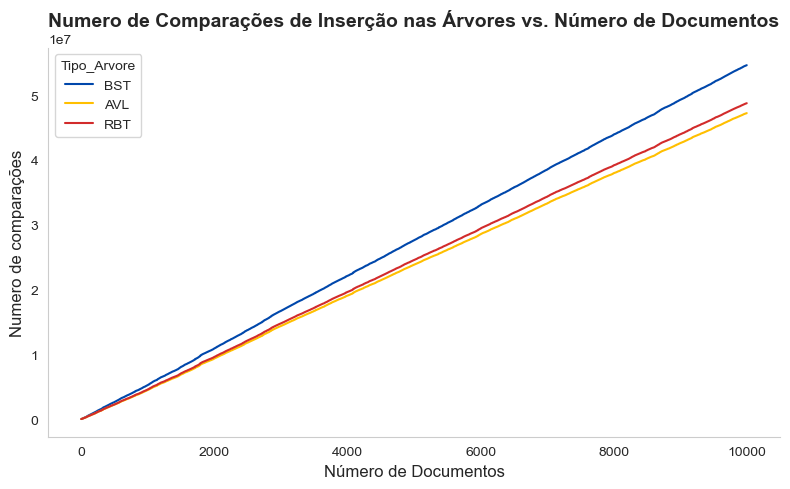

In [55]:
plotTreesLines(df, 'Num_Docs', 'Total_Comparacoes_Indexacao', 'Número de Documentos', 'Numero de comparações', 'Numero de Comparações de Inserção nas Árvores vs. Número de Documentos')

---

#### Tempo Total de Indexação

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


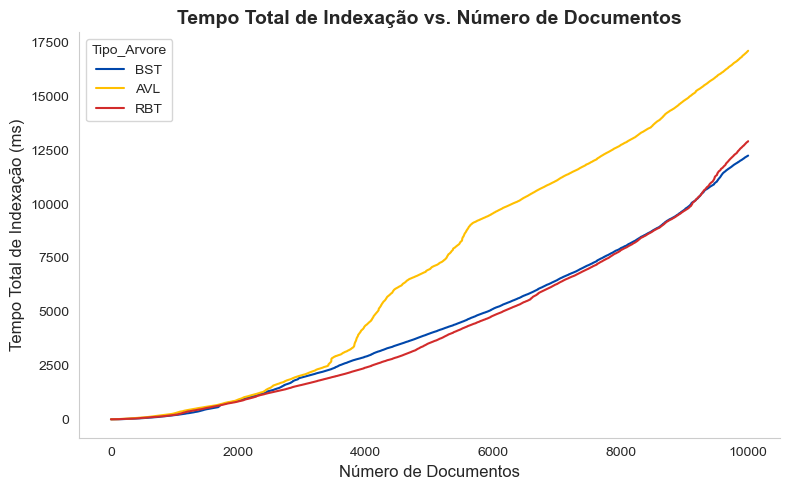

In [56]:
plotTreesLines(df, 'Num_Docs', 'Tempo_Total_Indexacao', 'Número de Documentos', 'Tempo Total de Indexação (ms)', 'Tempo Total de Indexação vs. Número de Documentos')

---

#### Tempo Médio de Indexação

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


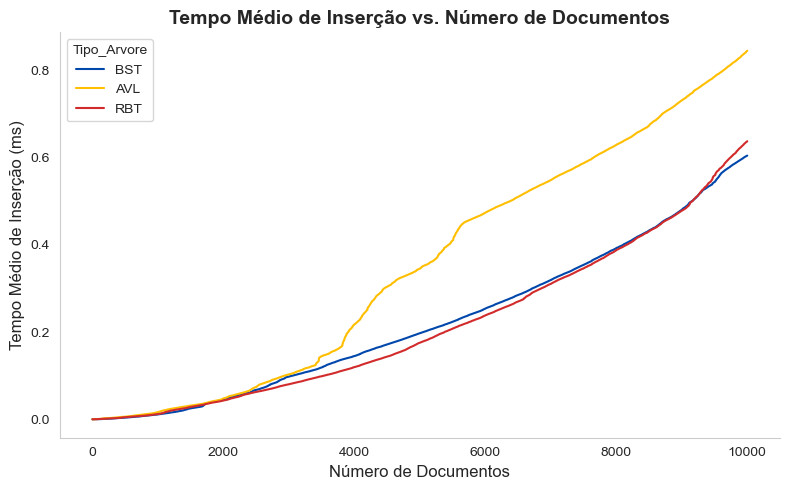

In [57]:
plotTreesLines(df, 'Num_Docs', 'Tempo_Medio_Insercao', 'Número de Documentos', 'Tempo Médio de Inserção (ms)', 'Tempo Médio de Inserção vs. Número de Documentos')

---

#### Altura das árvores

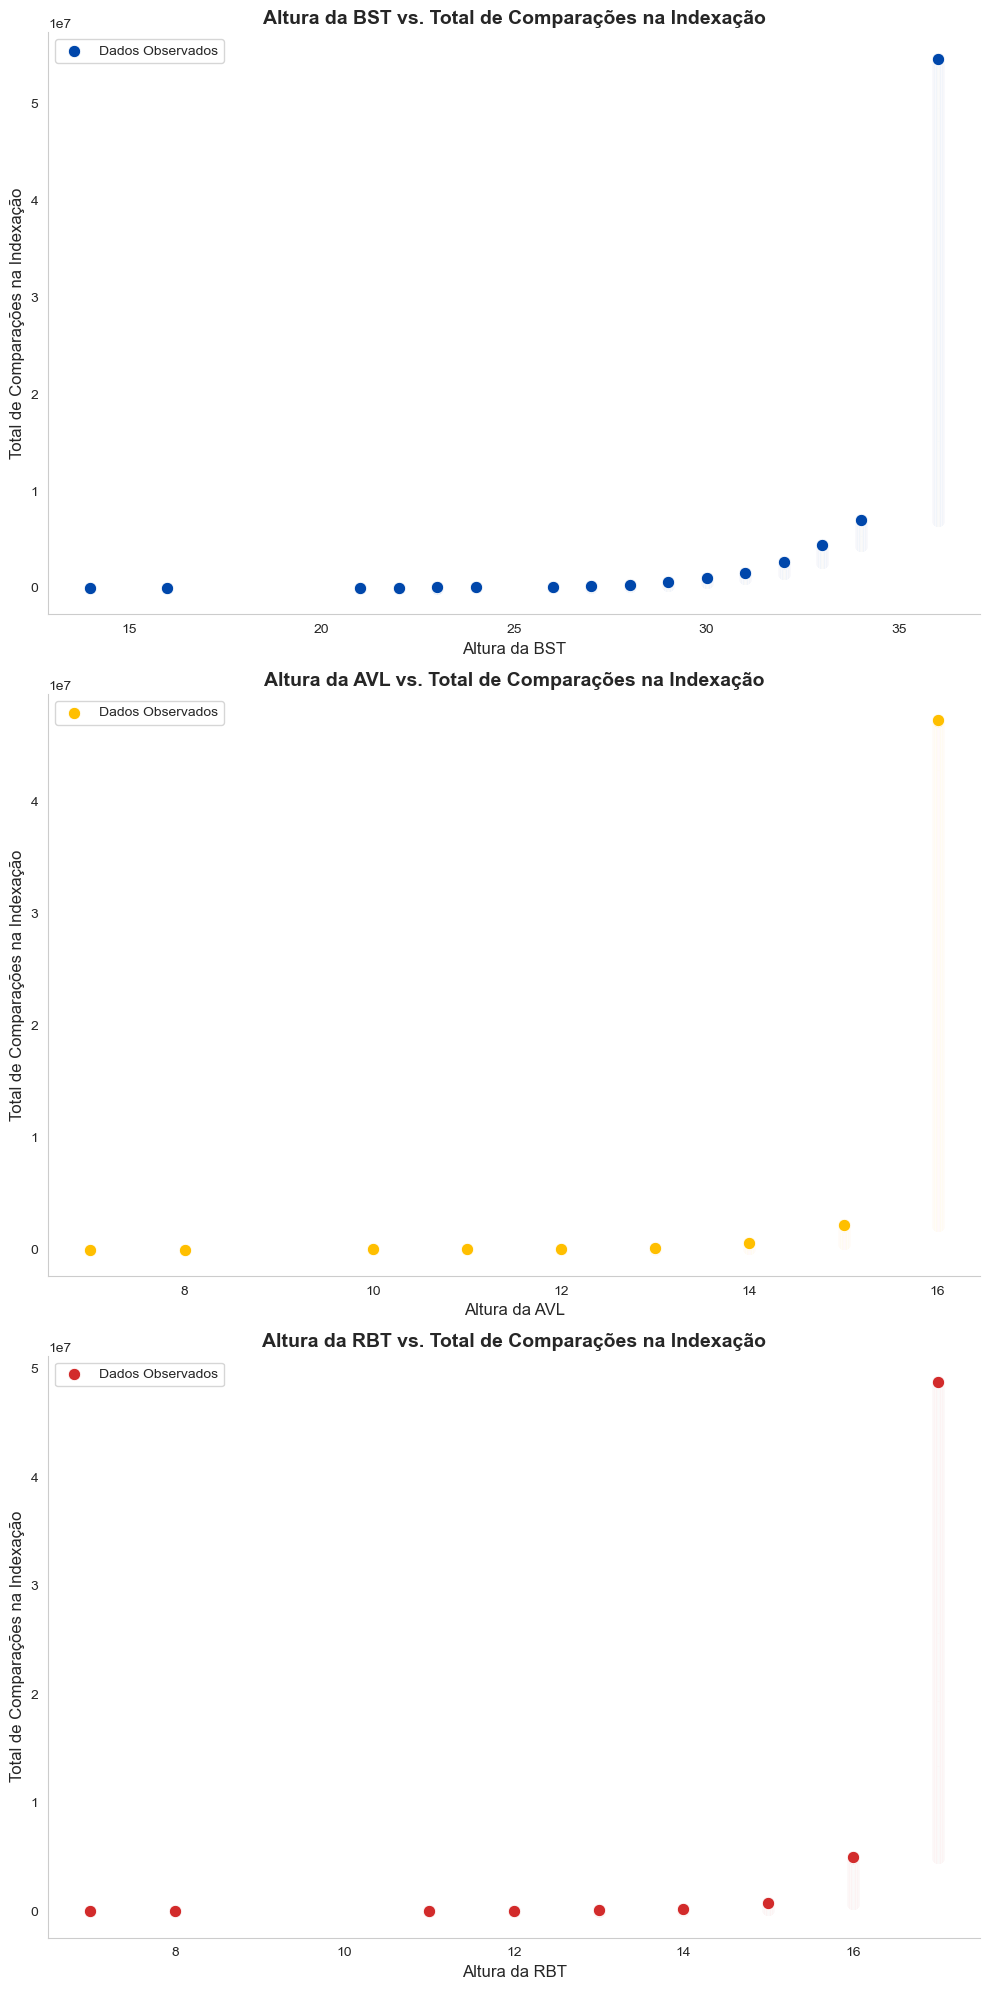

In [58]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,20))

# BST
plt.subplot(3,1,1)
sns.scatterplot(data=df[df['Tipo_Arvore'] == 'BST'], x='Altura', y='Total_Comparacoes_Indexacao', s=80, color='#0047AB', label='Dados Observados')
plt.xlabel('Altura da BST', fontsize=12)
plt.ylabel('Total de Comparações na Indexação', fontsize=12)
plt.title('Altura da BST vs. Total de Comparações na Indexação', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend() # Chama a legenda
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# AVL
plt.subplot(3,1,2)
sns.scatterplot(data=df[df['Tipo_Arvore'] == 'AVL'], x='Altura', y='Total_Comparacoes_Indexacao', s=80, color='#FFBF00', label='Dados Observados')
plt.xlabel('Altura da AVL', fontsize=12)
plt.ylabel('Total de Comparações na Indexação', fontsize=12)
plt.title('Altura da AVL vs. Total de Comparações na Indexação', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend() # Chama a legenda
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# RBT
plt.subplot(3,1,3)
sns.scatterplot(data=df[df['Tipo_Arvore'] == 'RBT'], x='Altura', y='Total_Comparacoes_Indexacao', s=80, color='#D22B2B', label='Dados Observados')
plt.xlabel('Altura da RBT', fontsize=12)
plt.ylabel('Total de Comparações na Indexação', fontsize=12)
plt.title('Altura da RBT vs. Total de Comparações na Indexação', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend() # Chama a legenda
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)


plt.show()

---

#### Altura vs Tempo Médio de Inserção (Com linha de tendência)

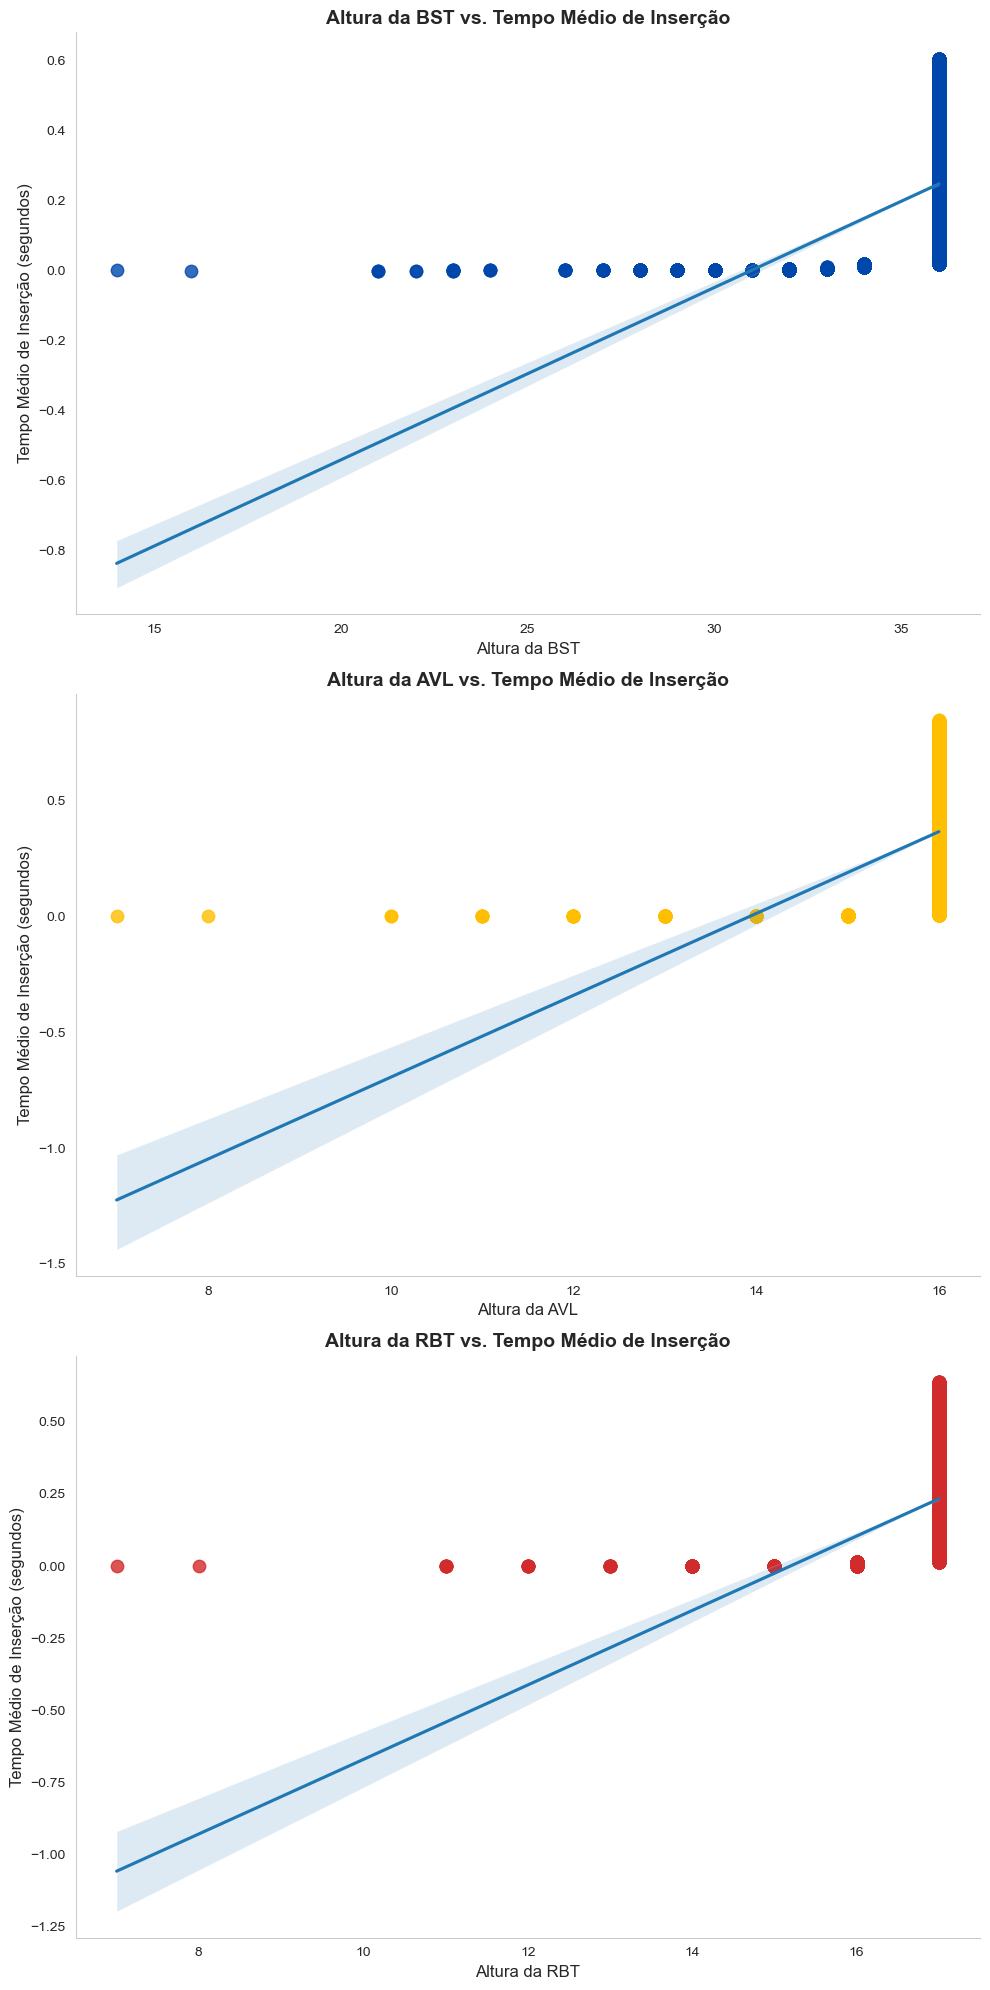

In [59]:
plt.figure(figsize=(10, 20))

#BST
plt.subplot(3,1,1)
sns.regplot(data=df[df['Tipo_Arvore'] == 'BST'], x='Altura', y='Tempo_Medio_Insercao', scatter_kws={'s':80, 'color': '#0047AB'}, line_kws={'color': '#1f77b4'})
plt.xlabel('Altura da BST', fontsize=12)
plt.ylabel('Tempo Médio de Inserção (segundos)', fontsize=12)
plt.title('Altura da BST vs. Tempo Médio de Inserção', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

#AVL
plt.subplot(3,1,2)
sns.regplot(data=df[df['Tipo_Arvore'] == 'AVL'], x='Altura', y='Tempo_Medio_Insercao', scatter_kws={'s':80, 'color': '#FFBF00'}, line_kws={'color': '#1f77b4'})
plt.xlabel('Altura da AVL', fontsize=12)
plt.ylabel('Tempo Médio de Inserção (segundos)', fontsize=12)
plt.title('Altura da AVL vs. Tempo Médio de Inserção', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

#RBT
plt.subplot(3,1,3)
sns.regplot(data=df[df['Tipo_Arvore'] == 'RBT'], x='Altura', y='Tempo_Medio_Insercao', scatter_kws={'s':80, 'color': '#D22B2B'}, line_kws={'color': '#1f77b4'})
plt.xlabel('Altura da RBT', fontsize=12)
plt.ylabel('Tempo Médio de Inserção (segundos)', fontsize=12)
plt.title('Altura da RBT vs. Tempo Médio de Inserção', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


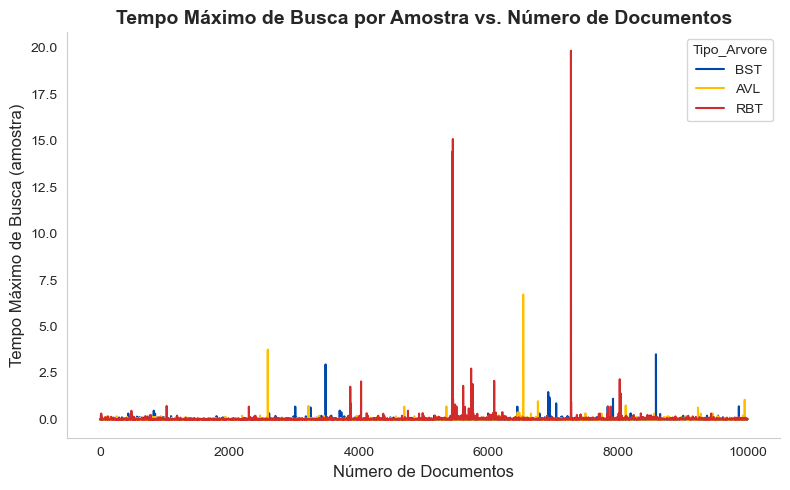

In [60]:
plotTreesLines(
    df,
    x="Num_Docs",
    y="Tempo_Maximo_Busca_Amostra",
    x_label="Número de Documentos",
    y_label="Tempo Máximo de Busca (amostra)",
    title="Tempo Máximo de Busca por Amostra vs. Número de Documentos"
)


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


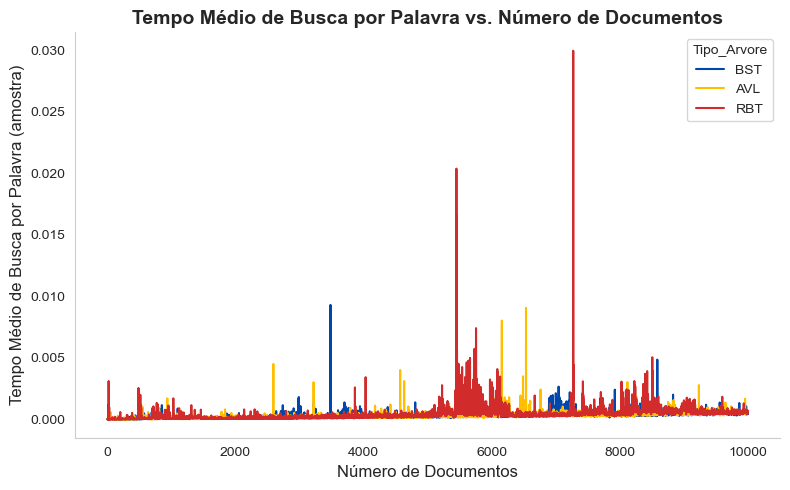

In [61]:
plotTreesLines(
    df,
    x="Num_Docs",
    y="Tempo_Medio_Busca_Amostra_Por_Palavra",
    x_label="Número de Documentos",
    y_label="Tempo Médio de Busca por Palavra (amostra)",
    title="Tempo Médio de Busca por Palavra vs. Número de Documentos"
)


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


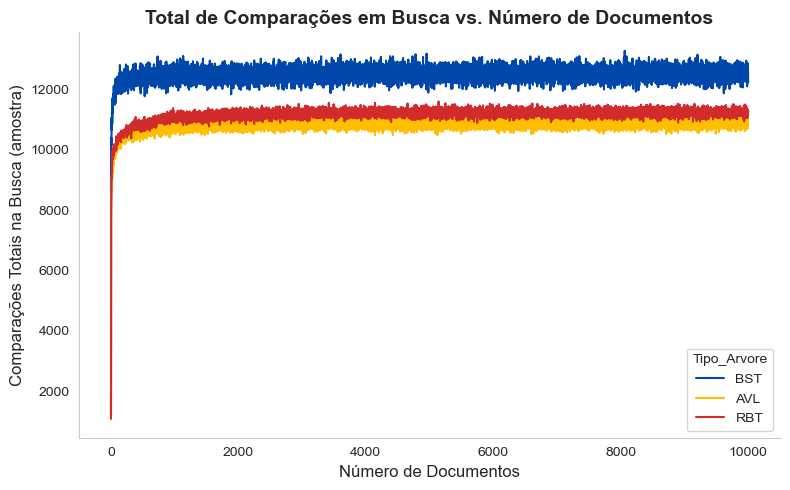

In [62]:
plotTreesLines(
    df,
    x="Num_Docs",
    y="Comparacoes_Total_Busca_Amostra",
    x_label="Número de Documentos",
    y_label="Comparações Totais na Busca (amostra)",
    title="Total de Comparações em Busca vs. Número de Documentos"
)


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


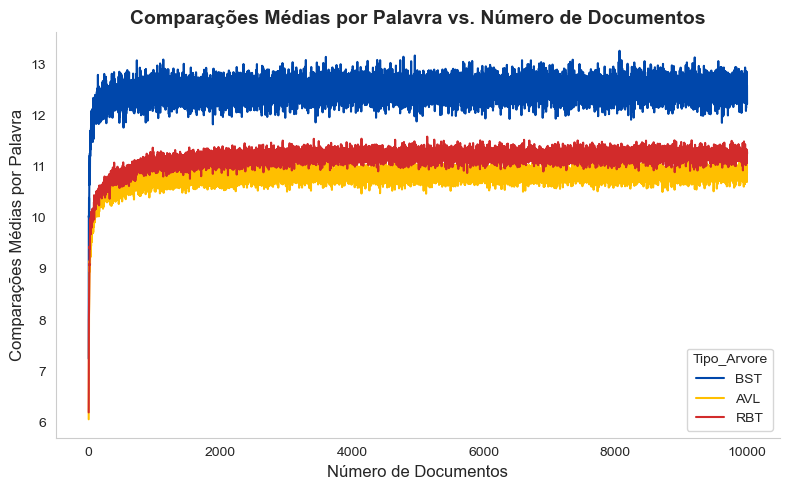

In [63]:
plotTreesLines(
    df,
    x="Num_Docs",
    y="Comparacoes_Medias_Busca_Amostra_Por_Palavra",
    x_label="Número de Documentos",
    y_label="Comparações Médias por Palavra",
    title="Comparações Médias por Palavra vs. Número de Documentos"
)


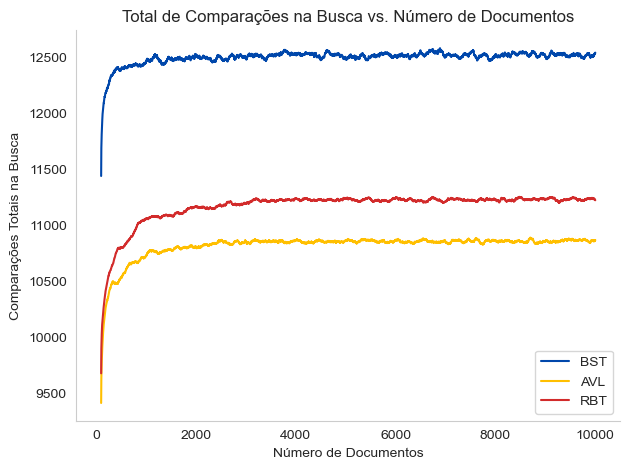

In [70]:
window_size = 100  # Escolha o tamanho do "suavizador"

for tipo, cor in zip(['BST', 'AVL', 'RBT'], ['#0047AB', '#FFBF00', '#D22B2B']):
    subset = df[df['Tipo_Arvore'] == tipo].sort_values('Num_Docs')
    rolling_mean = subset['Comparacoes_Total_Busca_Amostra'].rolling(window_size).mean()
    plt.plot(subset['Num_Docs'], rolling_mean, label=tipo, color=cor)

plt.xlabel("Número de Documentos")
plt.ylabel("Comparações Totais na Busca")
plt.title("Total de Comparações na Busca vs. Número de Documentos")
plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)
plt.show()

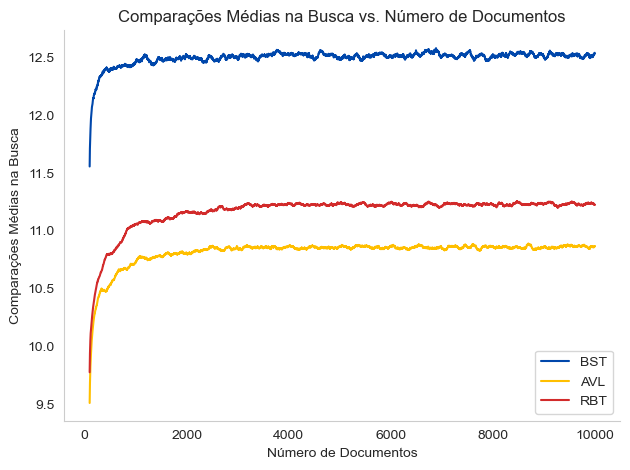

In [68]:
window_size = 100  # Escolha o tamanho do "suavizador"

for tipo, cor in zip(['BST', 'AVL', 'RBT'], ['#0047AB', '#FFBF00', '#D22B2B']):
    subset = df[df['Tipo_Arvore'] == tipo].sort_values('Num_Docs')
    rolling_mean = subset['Comparacoes_Medias_Busca_Amostra_Por_Palavra'].rolling(window_size).mean()
    plt.plot(subset['Num_Docs'], rolling_mean, label=tipo, color=cor)

plt.xlabel("Número de Documentos")
plt.ylabel("Comparações Médias na Busca")
plt.title("Comparações Médias na Busca vs. Número de Documentos")
plt.legend()
sns.despine(top=True, right=True)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
window_size = 100  # Escolha o tamanho do "suavizador"

for tipo, cor in zip(['BST', 'AVL', 'RBT'], ['#0047AB', '#FFBF00', '#D22B2B']):
    subset = df[df['Tipo_Arvore'] == tipo].sort_values('Num_Docs')
    rolling_mean = subset['Com'].rolling(window_size).mean()
    plt.plot(subset['Num_Docs'], rolling_mean, label=tipo, color=cor)

plt.xlabel("Número de Documentos")
plt.ylabel("Comparações Totais na Busca")
plt.title("Total de Comparações na Busca vs. Número de Documentos")
plt.legend()
sns.despine(top=True, right=True)
plt.grid(False)
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

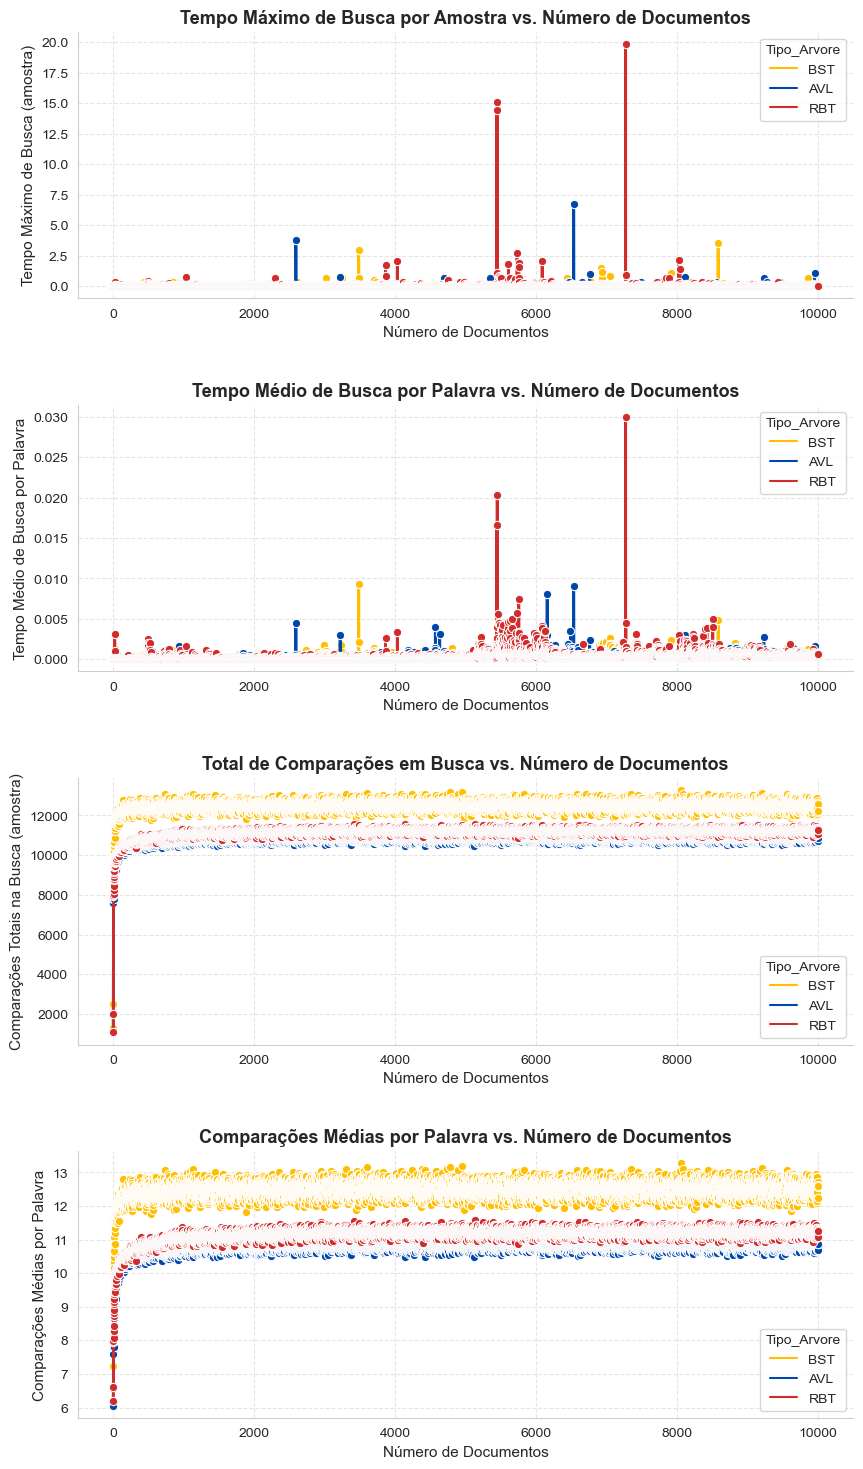

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set_style("whitegrid")
palette = {"AVL": "#0047AB", "BST": "#FFBF00", "RBT": "#D22B2B"}

# Lista de gráficos a gerar
graficos = [
    {
        "y": "Tempo_Maximo_Busca_Amostra",
        "y_label": "Tempo Máximo de Busca (amostra)",
        "title": "Tempo Máximo de Busca por Amostra vs. Número de Documentos"
    },
    {
        "y": "Tempo_Medio_Busca_Amostra_Por_Palavra",
        "y_label": "Tempo Médio de Busca por Palavra",
        "title": "Tempo Médio de Busca por Palavra vs. Número de Documentos"
    },
    {
        "y": "Comparacoes_Total_Busca_Amostra",
        "y_label": "Comparações Totais na Busca (amostra)",
        "title": "Total de Comparações em Busca vs. Número de Documentos"
    },
    {
        "y": "Comparacoes_Medias_Busca_Amostra_Por_Palavra",
        "y_label": "Comparações Médias por Palavra",
        "title": "Comparações Médias por Palavra vs. Número de Documentos"
    },
]

# Tamanho da figura para múltiplos gráficos
fig, axs = plt.subplots(len(graficos), 1, figsize=(10, 18))
plt.subplots_adjust(hspace=0.4)

# Gerar cada gráfico
for i, g in enumerate(graficos):
    ax = axs[i]
    sns.lineplot(
        data=df,
        x="Num_Docs",
        y=g["y"],
        hue="Tipo_Arvore",
        palette=palette,
        ax=ax,
        linewidth=2,
        marker='o'
    )
    ax.set_xlabel("Número de Documentos", fontsize=11)
    ax.set_ylabel(g["y_label"], fontsize=11)
    ax.set_title(g["title"], fontsize=13, fontweight='bold')
    ax.tick_params(labelsize=10)
    sns.despine(ax=ax, top=True, right=True)
    ax.grid(True, linestyle='--', alpha=0.5)

# Mostrar todos
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


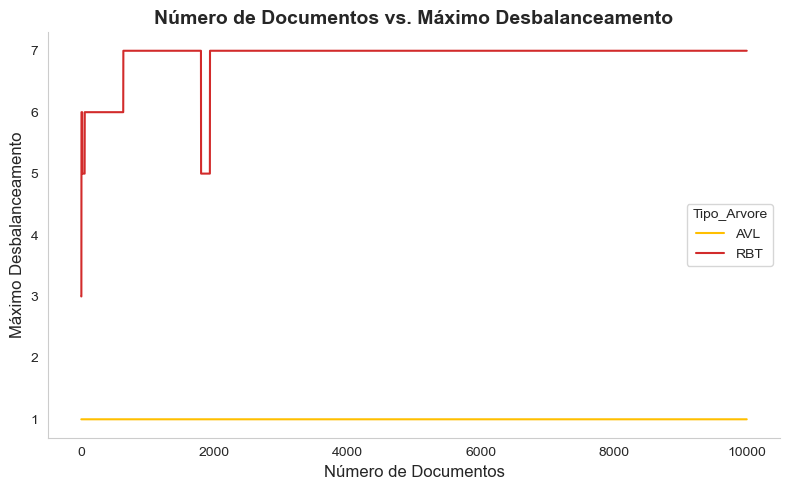

In [74]:
sns.set_style("whitegrid")

# Criar a figura
palette = ["#FFBF00", "#D22B2B"]
plt.figure(figsize=(8, 5))
sns.lineplot(data=df[df['Tipo_Arvore'] != "BST"], x='Num_Docs', y='Max_Desbalanceamento', hue="Tipo_Arvore", palette=palette)

# Rótulos e título com melhor formatação
plt.xlabel("Número de Documentos", fontsize=12)
plt.ylabel("Máximo Desbalanceamento", fontsize=12)
plt.title("Número de Documentos vs. Máximo Desbalanceamento", fontsize=14, fontweight='bold')
# Remover as bordas superior e direita
sns.despine(top=True, right=True)

# Retirar grade
plt.grid(False)
# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

---